In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import catboost as cat

https://www.kaggle.com/datasets/sukhmandeepsinghbrar/house-prices-india

# Анализ данных

In [2]:
df = pd.read_csv('../Data/House Price India.csv')
df

id   Date  number of bedrooms  number of bathrooms  \
0      6762810635  42491                   4                 2.50   
1      6762810998  42491                   5                 2.75   
2      6762812605  42491                   4                 2.50   
3      6762812919  42491                   3                 2.00   
4      6762813105  42491                   3                 2.50   
...           ...    ...                 ...                  ...   
14614  6762830250  42734                   2                 1.50   
14615  6762830339  42734                   3                 2.00   
14616  6762830618  42734                   2                 1.00   
14617  6762830709  42734                   4                 1.00   
14618  6762831463  42734                   3                 1.00   

       living area  lot area  number of floors  waterfront present  \
0             2920      4000               1.5                   0   
1             2910      9480               1.5                   0   
2             3310     42998               2.0                   0   
3             2710      4500               1.5                   0   
4             2600      4750               1.0                   0   
...            ...       ...               ...                 ...   
14614         1556     20000               1.0                   0   
14615         1680      7000               1.5                   0   
14616         1070      6120               1.0                   0   
14617         1030      6621               1.0                   0   
14618          900      4770               1.0                   0   

       number of views  condition of the house  ...  Built Year  \
0                    0                       5  ...        1909   
1                    0                       3  ...        1939   
2                    0                       3  ...        2001   
3                    0                       4  ...        1929   
4                    0                       4  ...        1951   
...                ...                     ...  ...         ...   
14614                0                       4  ...        1957   
14615                0                       4  ...        1968   
14616                0                       3  ...        1962   
14617                0                       4  ...        1955   
14618                0                       3  ...        1969   

       Renovation Year  Postal Code  Lattitude  Longitude  living_area_renov  \
0                    0       122004    52.8878   -114.470               2470   
1                    0       122004    52.8852   -114.468               2940   
2                    0       122005    52.9532   -114.321               3350   
3                    0       122006    52.9047   -114.485               2060   
4                    0       122007    52.9133   -114.590               2380   
...                ...          ...        ...        ...                ...   
14614                0       122066    52.6191   -114.472               2250   
14615                0       122072    52.5075   -114.393               1540   
14616                0       122056    52.7289   -114.507               1130   
14617                0       122042    52.7157   -114.411               1420   
14618             2009       122018    52.5338   -114.552                900   

       lot_area_renov  Number of schools nearby  Distance from the airport  \
0                4000                         2                         51   
1                6600                         1                         53   
2               42847                         3                         76   
3                4500                         1                         51   
4                4750                         1                         67   
...               ...                       ...                        ...   
14614           17286            

In [3]:
df['number of bedrooms'].value_counts()

number of bedrooms
3     6612
4     4724
2     1844
5     1078
6      176
1      136
7       30
8       11
9        3
10       3
33       1
11       1
Name: count, dtype: int64

In [4]:
df['number of bathrooms'].value_counts()

number of bathrooms
2.50    3677
1.00    2509
1.75    2062
2.25    1378
2.00    1323
1.50     968
2.75     831
3.00     510
3.50     504
3.25     424
3.75     101
4.00      81
4.50      72
4.25      56
0.75      47
4.75      17
5.00      15
5.25      12
5.50       8
1.25       7
0.50       3
6.00       3
8.00       2
5.75       2
6.25       2
6.75       2
6.50       1
7.50       1
7.75       1
Name: count, dtype: int64

In [5]:
df['number of floors'].value_counts()

number of floors
1.0    7103
2.0    5665
1.5    1311
3.0     418
2.5     118
3.5       4
Name: count, dtype: int64

In [6]:
df['Renovation Year'].value_counts()

Renovation Year
0       13953
2014       76
2013       30
2003       27
2005       23
        ...  
1948        1
1967        1
1944        1
1959        1
1962        1
Name: count, Length: 68, dtype: int64

1) используется не метрическая система измерений
2) этажи и ванные - десятичные значения
3) площадь некоторых домов меняется после реновации

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [8]:
df[df.duplicated()]

Empty DataFrame
Columns: [id, Date, number of bedrooms, number of bathrooms, living area, lot area, number of floors, waterfront present, number of views, condition of the house, grade of the house, Area of the house(excluding basement), Area of the basement, Built Year, Renovation Year, Postal Code, Lattitude, Longitude, living_area_renov, lot_area_renov, Number of schools nearby, Distance from the airport, Price]
Index: []

[0 rows x 23 columns]

In [9]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='Price')
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

In [10]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=100, random_state=32)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Learning rate set to 0.384379
0:	learn: 243700.5602382	total: 57ms	remaining: 5.64s
1:	learn: 180522.1027153	total: 58.6ms	remaining: 2.87s
2:	learn: 140110.3602649	total: 60.1ms	remaining: 1.94s
3:	learn: 114279.7965956	total: 61.6ms	remaining: 1.48s
4:	learn: 99180.6332733	total: 63ms	remaining: 1.2s
5:	learn: 90830.1955635	total: 65.3ms	remaining: 1.02s
6:	learn: 88934.7094202	total: 66.4ms	remaining: 882ms
7:	learn: 87450.6041112	total: 67.8ms	remaining: 780ms
8:	learn: 86082.5505223	total: 68.5ms	remaining: 693ms
9:	learn: 83642.7182495	total: 69.8ms	remaining: 628ms
10:	learn: 78575.1914435	total: 71.1ms	remaining: 575ms
11:	learn: 77784.7655088	total: 72ms	remaining: 528ms
12:	learn: 76807.7147514	total: 73.3ms	remaining: 491ms
13:	learn: 72408.6635612	total: 74.6ms	remaining: 458ms
14:	learn: 71924.4582701	total: 75.7ms	remaining: 429ms
15:	learn: 69680.5219201	total: 77.1ms	remaining: 405ms
16:	learn: 69213.4607173	total: 78ms	remaining: 381ms
17:	learn: 68670.8523650	total: 7

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_pred, y_test)

print('MSE = ', mse)
print('RMSE = ', rmse)
print('RRMSE = ', rmse / df['Price'].mean() * 100)
print('MAE = ', mae)
print('Score = ', model.score(X_test,y_test))

MSE =  12694459353.959095
RMSE =  112669.69137243208
RRMSE =  20.910983260887374
MAE =  27444.47237827808
Score =  0.9240384554134005


In [12]:
df

id   Date  number of bedrooms  number of bathrooms  \
0      6762810635  42491                   4                 2.50   
1      6762810998  42491                   5                 2.75   
2      6762812605  42491                   4                 2.50   
3      6762812919  42491                   3                 2.00   
4      6762813105  42491                   3                 2.50   
...           ...    ...                 ...                  ...   
14614  6762830250  42734                   2                 1.50   
14615  6762830339  42734                   3                 2.00   
14616  6762830618  42734                   2                 1.00   
14617  6762830709  42734                   4                 1.00   
14618  6762831463  42734                   3                 1.00   

       living area  lot area  number of floors  waterfront present  \
0             2920      4000               1.5                   0   
1             2910      9480               1.5                   0   
2             3310     42998               2.0                   0   
3             2710      4500               1.5                   0   
4             2600      4750               1.0                   0   
...            ...       ...               ...                 ...   
14614         1556     20000               1.0                   0   
14615         1680      7000               1.5                   0   
14616         1070      6120               1.0                   0   
14617         1030      6621               1.0                   0   
14618          900      4770               1.0                   0   

       number of views  condition of the house  ...  Built Year  \
0                    0                       5  ...        1909   
1                    0                       3  ...        1939   
2                    0                       3  ...        2001   
3                    0                       4  ...        1929   
4                    0                       4  ...        1951   
...                ...                     ...  ...         ...   
14614                0                       4  ...        1957   
14615                0                       4  ...        1968   
14616                0                       3  ...        1962   
14617                0                       4  ...        1955   
14618                0                       3  ...        1969   

       Renovation Year  Postal Code  Lattitude  Longitude  living_area_renov  \
0                    0       122004    52.8878   -114.470               2470   
1                    0       122004    52.8852   -114.468               2940   
2                    0       122005    52.9532   -114.321               3350   
3                    0       122006    52.9047   -114.485               2060   
4                    0       122007    52.9133   -114.590               2380   
...                ...          ...        ...        ...                ...   
14614                0       122066    52.6191   -114.472               2250   
14615                0       122072    52.5075   -114.393               1540   
14616                0       122056    52.7289   -114.507               1130   
14617                0       122042    52.7157   -114.411               1420   
14618             2009       122018    52.5338   -114.552                900   

       lot_area_renov  Number of schools nearby  Distance from the airport  \
0                4000                         2                         51   
1                6600                         1                         53   
2               42847                         3                         76   
3                4500                         1                         51   
4                4750                         1                         67   
...               ...                       ...                        ...   
14614           17286            

In [13]:
df['Renovation Year'].value_counts()

Renovation Year
0       13953
2014       76
2013       30
2003       27
2005       23
        ...  
1948        1
1967        1
1944        1
1959        1
1962        1
Name: count, Length: 68, dtype: int64

In [14]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

Нужно проверить 
1) как влияют переменные id, Date, Postal Code, Lattitude, Longitude, Renovation Year, living_area_renov, lot_area_renov
2) как влияет количество итераций

In [15]:
#X = df.drop(columns=['Postal Code', 'Renovation Year', 'living_area_renov', 'lot_area_renov', 'Price'])
#X = df.drop(columns=['Postal Code', 'living area', 'lot area', 'Price'])

In [16]:
X = df.drop(columns=['Price', 'Postal Code'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Learning rate set to 0.384379
0:	learn: 238712.2107899	total: 2.4ms	remaining: 238ms
1:	learn: 175726.0705861	total: 3.98ms	remaining: 195ms
2:	learn: 137902.6935036	total: 5.72ms	remaining: 185ms
3:	learn: 115257.3377960	total: 8.1ms	remaining: 194ms
4:	learn: 99790.1530563	total: 9.56ms	remaining: 182ms
5:	learn: 92392.9131133	total: 11.1ms	remaining: 174ms
6:	learn: 90723.5384158	total: 12ms	remaining: 159ms
7:	learn: 89259.4108631	total: 13.2ms	remaining: 151ms
8:	learn: 87940.9097790	total: 14.1ms	remaining: 143ms
9:	learn: 86984.6293207	total: 15.2ms	remaining: 137ms
10:	learn: 79844.8608674	total: 16.5ms	remaining: 133ms
11:	learn: 79083.9485450	total: 17.9ms	remaining: 131ms
12:	learn: 74524.2784485	total: 19.2ms	remaining: 129ms
13:	learn: 74000.1463800	total: 20.3ms	remaining: 125ms
14:	learn: 71361.8067498	total: 21.8ms	remaining: 123ms
15:	learn: 68690.6692524	total: 23.4ms	remaining: 123ms
16:	learn: 67589.5011347	total: 24.9ms	remaining: 121ms
17:	learn: 65580.9529909	tot

In [17]:
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_pred, y_test)

print('MSE = ', mse)
print('RMSE = ', rmse)
print('RRMSE = ', rmse / df['Price'].mean() * 100)
print('MAE = ', mae)
print('Score = ', model.score(X_test,y_test))

MSE =  15465370957.737852
RMSE =  124359.84463538804
RRMSE =  23.08062263968745
MAE =  29474.55876423269
Score =  0.9074577787995263


# Подбор гиперпараметров

1) Стартовые данные

In [18]:
from sklearn.model_selection import GridSearchCV

# Параметры для перебора
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'depth': [4, 6, 10],
    'l2_leaf_reg': [1, 2, 3],
}

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)

# Обучение GridSearchCV
grid_search.fit(X_train, y_train)

# Лучшая модель
best_model = grid_search.best_estimator_

# Предсказания лучшей модели
y_pred = best_model.predict(X_test)

0:	learn: 344086.5834163	total: 1.75ms	remaining: 173ms
1:	learn: 341246.3764998	total: 3.1ms	remaining: 152ms
2:	learn: 338436.3619168	total: 4.32ms	remaining: 140ms
3:	learn: 335660.5264521	total: 5.41ms	remaining: 130ms
4:	learn: 332916.0556536	total: 6.48ms	remaining: 123ms
5:	learn: 330176.1156738	total: 7.6ms	remaining: 119ms
6:	learn: 327360.8143428	total: 9.23ms	remaining: 123ms
7:	learn: 324678.8994739	total: 10.4ms	remaining: 119ms
8:	learn: 321932.3589820	total: 11.3ms	remaining: 115ms
9:	learn: 319347.1959111	total: 12.5ms	remaining: 113ms
10:	learn: 316759.6249467	total: 13.6ms	remaining: 110ms
11:	learn: 314219.4390588	total: 14.7ms	remaining: 108ms
12:	learn: 311682.5323597	total: 15.7ms	remaining: 105ms
13:	learn: 309096.5147716	total: 16.7ms	remaining: 103ms
14:	learn: 306637.5643842	total: 17.8ms	remaining: 101ms
15:	learn: 304177.3418995	total: 18.6ms	remaining: 97.9ms
16:	learn: 301744.5264040	total: 20.2ms	remaining: 98.5ms
17:	learn: 299342.8783576	total: 21.1ms	r

In [19]:
# Расчет метрик
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('Лучшие параметры:', grid_search.best_params_)
print('MSE =', mse)
print('RMSE =', rmse)
print('RRMSE =', rmse / df['Price'].mean() * 100)
print('MAE =', mae)
print('Score = ', best_model.score(X_test,y_test))

Лучшие параметры: {'depth': 6, 'l2_leaf_reg': 2, 'learning_rate': 0.1}
MSE = 13333563476.366219
RMSE = 115471.05038218982
RRMSE = 21.430902776484032
MAE = 29365.917809590905
Score =  0.9202141620791147


2) Подбор

In [20]:
# Параметры для перебора
param_grid = {
    'learning_rate': [0.31095, 0.311, 0.3115],
    'depth': [7, 6, 10],
    'l2_leaf_reg': [1,2],
}

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)

# Обучение GridSearchCV
grid_search.fit(X_train, y_train)

# Лучшая модель
best_model = grid_search.best_estimator_

# Предсказания лучшей модели
y_pred = best_model.predict(X_test)

0:	learn: 256479.6042497	total: 2.51ms	remaining: 249ms
1:	learn: 194782.0535473	total: 5.3ms	remaining: 260ms
2:	learn: 155551.9202226	total: 7.07ms	remaining: 229ms
3:	learn: 124300.2881128	total: 9.25ms	remaining: 222ms
4:	learn: 105440.0013503	total: 10.9ms	remaining: 207ms
5:	learn: 92277.0164902	total: 12.6ms	remaining: 197ms
6:	learn: 82715.4068606	total: 14.4ms	remaining: 191ms
7:	learn: 75674.9786055	total: 16.7ms	remaining: 192ms
8:	learn: 70640.4614066	total: 18.5ms	remaining: 187ms
9:	learn: 65520.4244641	total: 20.1ms	remaining: 181ms
10:	learn: 62634.5045755	total: 21.9ms	remaining: 177ms
11:	learn: 60183.8739498	total: 24.1ms	remaining: 177ms
12:	learn: 58046.5281042	total: 26.1ms	remaining: 175ms
13:	learn: 56303.5049401	total: 27.8ms	remaining: 171ms
14:	learn: 55455.5813957	total: 29.5ms	remaining: 167ms
15:	learn: 53619.1902121	total: 31.3ms	remaining: 164ms
16:	learn: 51758.2373236	total: 33.8ms	remaining: 165ms
17:	learn: 50540.5016068	total: 35.9ms	remaining: 163m

In [21]:
# Расчет метрик
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('Лучшие параметры:', grid_search.best_params_)
print('MSE =', mse)
print('RMSE =', rmse)
print('RRMSE =', rmse / df['Price'].mean() * 100)
print('MAE =', mae)
print('Score = ', best_model.score(X_test,y_test))

Лучшие параметры: {'depth': 6, 'l2_leaf_reg': 1, 'learning_rate': 0.3115}
MSE = 9696676301.232712
RMSE = 98471.7030483007
RRMSE = 18.275901078911776
MAE = 26519.071197362973
Score =  0.9419766932438763


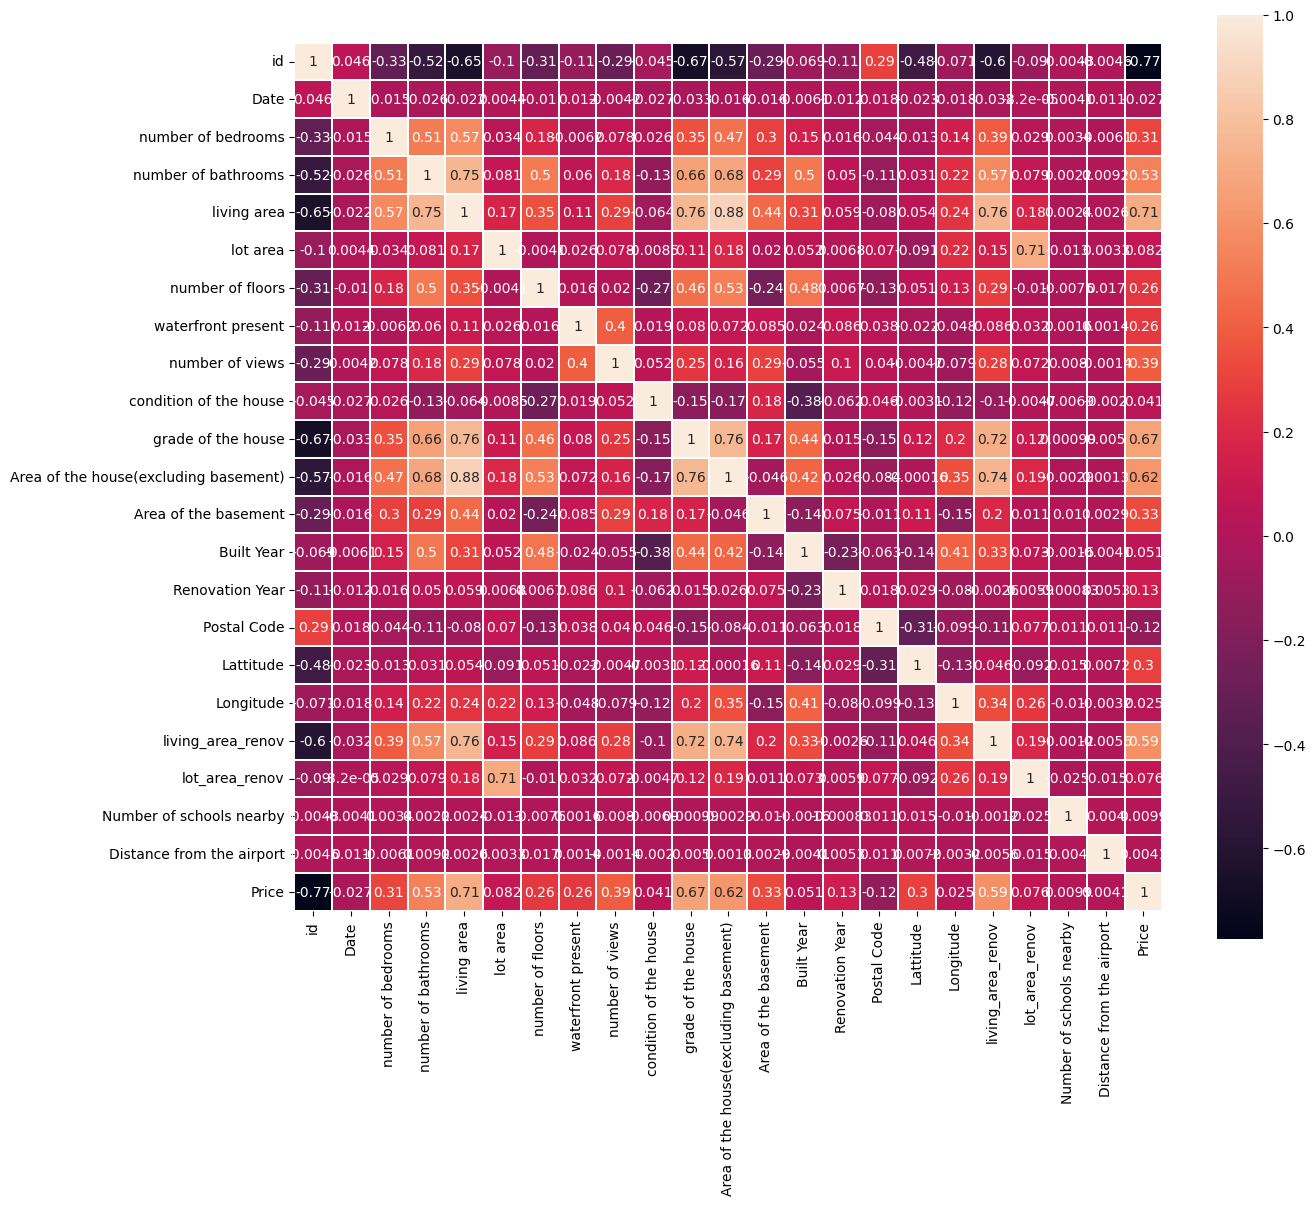

In [22]:
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,  linecolor='white', annot=True)
plt.show()

# Убираем переменные не содержащие значимых данных и выбросы

In [23]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [24]:
X = df.drop(columns=['id', 'Date', 'Lattitude', 'Longitude', 'Price', 'number of views'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.3)
model = CatBoostRegressor(iterations=100, random_state=32)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Learning rate set to 0.384379
0:	learn: 282802.1051119	total: 2.74ms	remaining: 271ms
1:	learn: 244486.8826278	total: 5.04ms	remaining: 247ms
2:	learn: 218041.4432243	total: 7.65ms	remaining: 247ms
3:	learn: 200405.3455796	total: 9.87ms	remaining: 237ms
4:	learn: 188548.8348923	total: 12.9ms	remaining: 245ms
5:	learn: 182629.1251548	total: 17.5ms	remaining: 274ms
6:	learn: 176473.7797069	total: 19.4ms	remaining: 258ms
7:	learn: 172395.6593986	total: 21.4ms	remaining: 246ms
8:	learn: 170738.6086985	total: 31.1ms	remaining: 314ms
9:	learn: 169309.4717729	total: 39.3ms	remaining: 353ms
10:	learn: 166069.6341256	total: 41.2ms	remaining: 333ms
11:	learn: 163224.7834123	total: 48.9ms	remaining: 359ms
12:	learn: 158970.9381902	total: 55.5ms	remaining: 371ms
13:	learn: 155884.4780733	total: 57.4ms	remaining: 353ms
14:	learn: 155629.2078952	total: 59.4ms	remaining: 336ms
15:	learn: 153390.6081694	total: 61.6ms	remaining: 323ms
16:	learn: 152850.4942923	total: 63.8ms	remaining: 311ms
17:	learn: 

In [25]:
# Расчет метрик
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('MSE =', mse)
print('RMSE =', rmse)
print('RRMSE =', rmse / df['Price'].mean() * 100)
print('MAE =', mae)
print('Score = ', model.score(X_test,y_test))

MSE = 27932954355.27456
RMSE = 167131.54805504123
RRMSE = 31.018856634591668
MAE = 83491.93289966305
Score =  0.8328538224015117


In [26]:
df1 = pd.DataFrame.join(X, y)
df1

number of bedrooms  number of bathrooms  living area  lot area  \
0                       4                 2.50         2920      4000   
1                       5                 2.75         2910      9480   
2                       4                 2.50         3310     42998   
3                       3                 2.00         2710      4500   
4                       3                 2.50         2600      4750   
...                   ...                  ...          ...       ...   
14614                   2                 1.50         1556     20000   
14615                   3                 2.00         1680      7000   
14616                   2                 1.00         1070      6120   
14617                   4                 1.00         1030      6621   
14618                   3                 1.00          900      4770   

       number of floors  waterfront present  condition of the house  \
0                   1.5                   0                       5   
1                   1.5                   0                       3   
2                   2.0                   0                       3   
3                   1.5                   0                       4   
4                   1.0                   0                       4   
...                 ...                 ...                     ...   
14614               1.0                   0                       4   
14615               1.5                   0                       4   
14616               1.0                   0                       3   
14617               1.0                   0                       4   
14618               1.0                   0                       3   

       grade of the house  Area of the house(excluding basement)  \
0                       8                                   1910   
1                       8                                   2910   
2                       9                                   3310   
3                       8                                   1880   
4                       9                                   1700   
...                   ...                                    ...   
14614                   7                                   1556   
14615                   7                                   1680   
14616                   6                                   1070   
14617                   6                                   1030   
14618                   6                                    900   

       Area of the basement  Built Year  Renovation Year  Postal Code  \
0                      1010        1909                0       122004   
1                         0        1939                0       122004   
2                         0        2001                0       122005   
3                       830        1929                0       122006   
4                       900        1951                0       122007   
...                     ...         ...              ...          ...   
14614                     0        1957                0       122066   
14615                     0        1968                0       122072   
14616                     0        1962                0       122056   
14617                     0        1955                0       122042   
14618                     0        1969             2009       122018   

       living_area_renov  lot_area_renov  Number of schools nearby  \
0                   2470            4000                         2   
1                   2940            6600                         1   
2                   3350           42847                         3   
3                   2060            4500                         1   
4                   2380            4750                         1   
...                  ...             ...                       ...   
14614               2250           17286                         3   
14615               154

<Axes: xlabel='living area', ylabel='Count'>

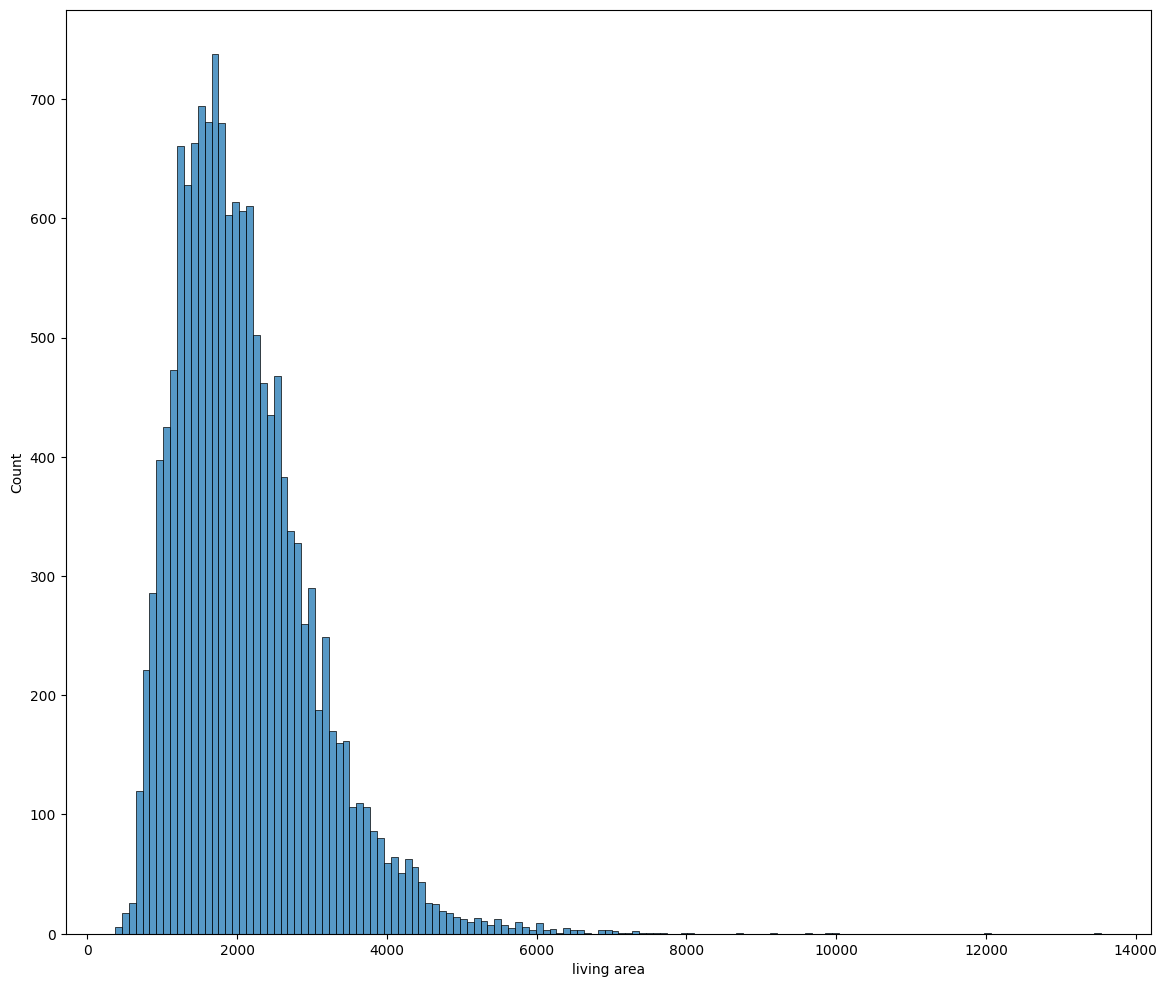

In [27]:
column = "living area"
plt.figure(figsize=(14,12))
sns.histplot(data=df1, x=column)

In [28]:
# Вычисление границ IQR
Q1, Q3 = X[column].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_board, upper_board = Q1 - 3 * IQR, Q3 + 3 * IQR  

# Отсеивание выбросов
new_df = df1[(df1[column] >= lower_board) & (df1[column] <= upper_board)]

<Axes: xlabel='living area', ylabel='Count'>

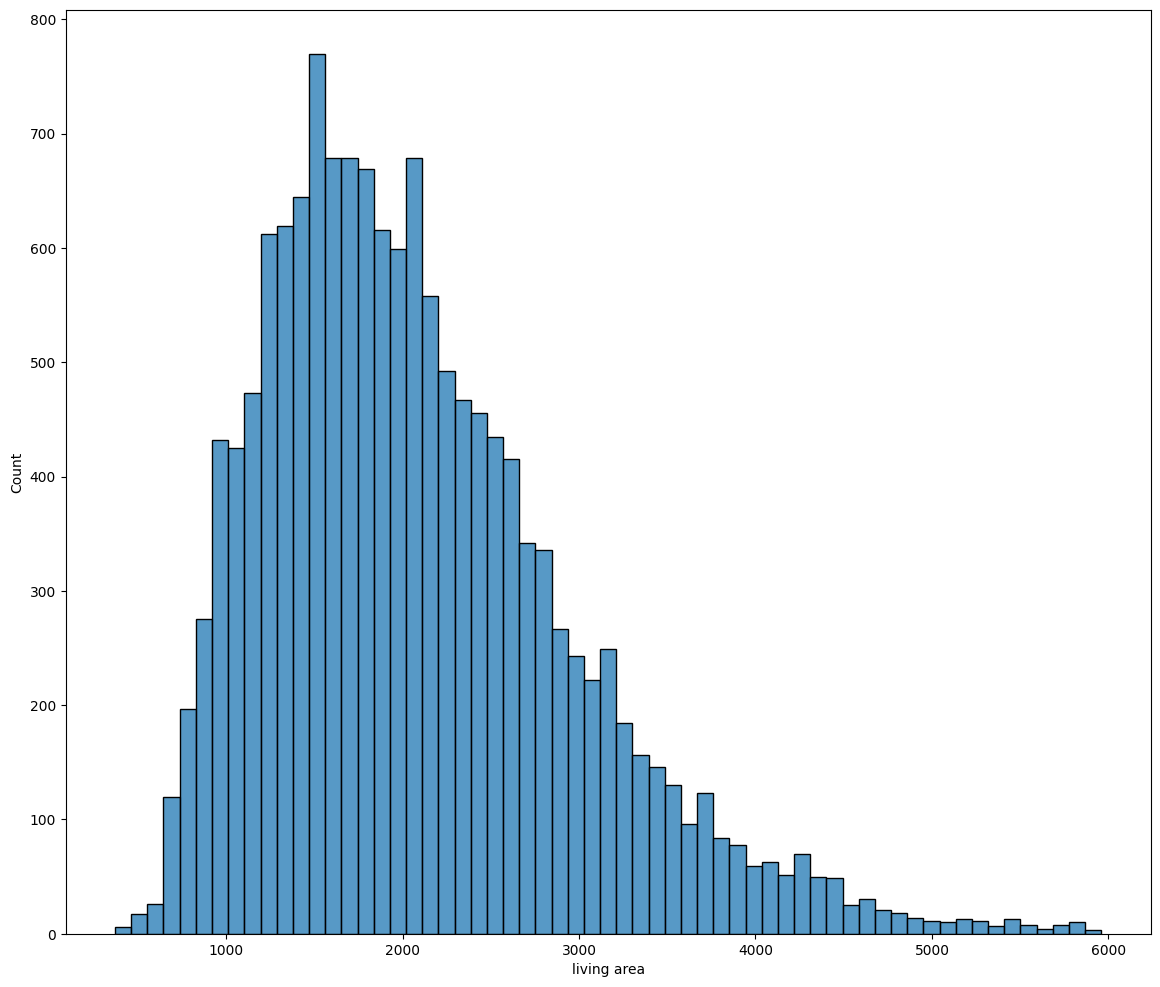

In [29]:
plt.figure(figsize=(14,12))
sns.histplot(data=new_df, x=column)

In [30]:
df1.columns

Index(['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'waterfront present', 'condition of the house',
       'grade of the house', 'Area of the house(excluding basement)',
       'Area of the basement', 'Built Year', 'Renovation Year', 'Postal Code',
       'living_area_renov', 'lot_area_renov', 'Number of schools nearby',
       'Distance from the airport', 'Price'],
      dtype='object')

In [31]:
columns = ['number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'Area of the house(excluding basement)', 'Area of the basement', 'living_area_renov', 'lot_area_renov']

In [32]:
for column in columns:
    # Вычисление границ IQR
    Q1, Q3 = X[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_board, upper_board = Q1 - 3 * IQR, Q3 + 3 * IQR  

    # Отсеивание выбросов
    df1 = df1[(df1[column] >= lower_board) & (df1[column] <= upper_board)]

In [33]:
df1

number of bedrooms  number of bathrooms  living area  lot area  \
0                       4                 2.50         2920      4000   
1                       5                 2.75         2910      9480   
3                       3                 2.00         2710      4500   
4                       3                 2.50         2600      4750   
5                       5                 3.25         3660     11995   
...                   ...                  ...          ...       ...   
14614                   2                 1.50         1556     20000   
14615                   3                 2.00         1680      7000   
14616                   2                 1.00         1070      6120   
14617                   4                 1.00         1030      6621   
14618                   3                 1.00          900      4770   

       number of floors  waterfront present  condition of the house  \
0                   1.5                   0                       5   
1                   1.5                   0                       3   
3                   1.5                   0                       4   
4                   1.0                   0                       4   
5                   2.0                   0                       3   
...                 ...                 ...                     ...   
14614               1.0                   0                       4   
14615               1.5                   0                       4   
14616               1.0                   0                       3   
14617               1.0                   0                       4   
14618               1.0                   0                       3   

       grade of the house  Area of the house(excluding basement)  \
0                       8                                   1910   
1                       8                                   2910   
3                       8                                   1880   
4                       9                                   1700   
5                      10                                   3660   
...                   ...                                    ...   
14614                   7                                   1556   
14615                   7                                   1680   
14616                   6                                   1070   
14617                   6                                   1030   
14618                   6                                    900   

       Area of the basement  Built Year  Renovation Year  Postal Code  \
0                      1010        1909                0       122004   
1                         0        1939                0       122004   
3                       830        1929                0       122006   
4                       900        1951                0       122007   
5                         0        2006                0       122008   
...                     ...         ...              ...          ...   
14614                     0        1957                0       122066   
14615                     0        1968                0       122072   
14616                     0        1962                0       122056   
14617                     0        1955                0       122042   
14618                     0        1969             2009       122018   

       living_area_renov  lot_area_renov  Number of schools nearby  \
0                   2470            4000                         2   
1                   2940            6600                         1   
3                   2060            4500                         1   
4                   2380            4750                         1   
5                   3320           11241                         3   
...                  ...             ...                       ...   
14614               2250           17286                         3   
14615               154

In [34]:
X = df1.drop(columns='Price')
y = df1['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.3)

model = CatBoostRegressor(iterations=100, random_state=32)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Learning rate set to 0.378029
0:	learn: 262790.0112772	total: 5.65ms	remaining: 560ms
1:	learn: 225264.3834299	total: 13.8ms	remaining: 677ms
2:	learn: 203345.2986047	total: 15.6ms	remaining: 506ms
3:	learn: 186219.0888838	total: 18.8ms	remaining: 451ms
4:	learn: 174653.7466436	total: 20.7ms	remaining: 394ms
5:	learn: 166946.1255027	total: 24.6ms	remaining: 386ms
6:	learn: 162717.6584201	total: 26.8ms	remaining: 356ms
7:	learn: 155133.4261900	total: 28.6ms	remaining: 329ms
8:	learn: 151606.0719381	total: 30.5ms	remaining: 309ms
9:	learn: 148949.9322095	total: 32.6ms	remaining: 293ms
10:	learn: 145573.0835805	total: 34.7ms	remaining: 281ms
11:	learn: 144104.1325941	total: 36.5ms	remaining: 268ms
12:	learn: 141647.8893557	total: 40.3ms	remaining: 270ms
13:	learn: 140058.0719295	total: 42.5ms	remaining: 261ms
14:	learn: 139361.8272080	total: 44.3ms	remaining: 251ms
15:	learn: 138537.8959514	total: 50.7ms	remaining: 266ms
16:	learn: 137827.4105438	total: 52.1ms	remaining: 254ms
17:	learn: 

In [35]:
# Расчет метрик
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('MSE =', mse)
print('RMSE =', rmse)
print('RRMSE =', rmse / df['Price'].mean() * 100)
print('MAE =', mae)
print('Score = ', model.score(X_test,y_test))

MSE = 15085298058.020683
RMSE = 122822.22135273683
RRMSE = 22.79524673838328
MAE = 73635.65541863786
Score =  0.8486036048798513


In [36]:
# Параметры для перебора
param_grid = {
    'learning_rate': [0.1, 0.3, 0.31],
    'depth': [6, 7, 10],
    'l2_leaf_reg': [1],
}

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)

# Обучение GridSearchCV
grid_search.fit(X_train, y_train)

# Лучшая модель
best_model = grid_search.best_estimator_

# Предсказания лучшей модели
y_pred = best_model.predict(X_test)

0:	learn: 305267.4762234	total: 1.92ms	remaining: 190ms
1:	learn: 289822.5202575	total: 3.53ms	remaining: 173ms
2:	learn: 275720.5745646	total: 5.45ms	remaining: 176ms
3:	learn: 262317.4595519	total: 7.53ms	remaining: 181ms
4:	learn: 250958.4957259	total: 9.09ms	remaining: 173ms
5:	learn: 241161.3760841	total: 10.8ms	remaining: 170ms
6:	learn: 233123.6217461	total: 12.4ms	remaining: 164ms
7:	learn: 225852.2710149	total: 13.9ms	remaining: 160ms
8:	learn: 218405.9069203	total: 17.2ms	remaining: 174ms
9:	learn: 211553.9714703	total: 18.7ms	remaining: 169ms
10:	learn: 205119.9164122	total: 20.4ms	remaining: 165ms
11:	learn: 200205.6216835	total: 23.6ms	remaining: 173ms
12:	learn: 195078.4821566	total: 25.6ms	remaining: 171ms
13:	learn: 190446.9721204	total: 26.9ms	remaining: 165ms
14:	learn: 186864.2183916	total: 28.2ms	remaining: 160ms
15:	learn: 182207.3709138	total: 29.6ms	remaining: 156ms
16:	learn: 179698.2776527	total: 31.1ms	remaining: 152ms
17:	learn: 176491.8272749	total: 32.6ms	r

In [37]:
# Расчет метрик
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('Лучшие параметры:', grid_search.best_params_)
print('MSE =', mse)
print('RMSE =', rmse)
print('RRMSE =', rmse / df['Price'].mean() * 100)
print('MAE =', mae)
print('Score = ', best_model.score(X_test,y_test))

Лучшие параметры: {'depth': 7, 'l2_leaf_reg': 1, 'learning_rate': 0.31}
MSE = 15161670603.399082
RMSE = 123132.7357098797
RRMSE = 22.852876793506237
MAE = 73960.5658659792
Score =  0.8478371282738228
